# Import Moduels

In [116]:
import sys
import os.path
import numpy as np
import time
import random
import array
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser

import plotly.graph_objects as go


# Load Data

In [117]:
fc = FileChooser()
fc

FileChooser(path='C:\DEV\AnimHost\python\notebooks', filename='', title='', show_hidden=False, select_desc='Se…

In [132]:
binaryFile = fc.selected

In [139]:
numBones = 28 # Skeleton 100 Style
dataType = 3 #Vector 3
numFeatures = numBones * dataType

In [134]:
bytesPerLine = numFeatures * 4 # num Features * float 32 (4 Bytes)
data =[]

In [135]:
frames = 2000 # Number of Frames to read

In [136]:
with open(binaryFile, "rb") as f:
    for i in np.arange(frames):
        f.seek(i*bytesPerLine)
        bytes = f.read(bytesPerLine)
        data.append(np.float32(array.array('f',bytes)))

In [137]:
_dat = np.concatenate(data).reshape(frames,-1)
_dat.shape

(2000, 84)

In [138]:
_data = _dat.reshape(frames*numBones,3)
_data.shape

(56000, 3)

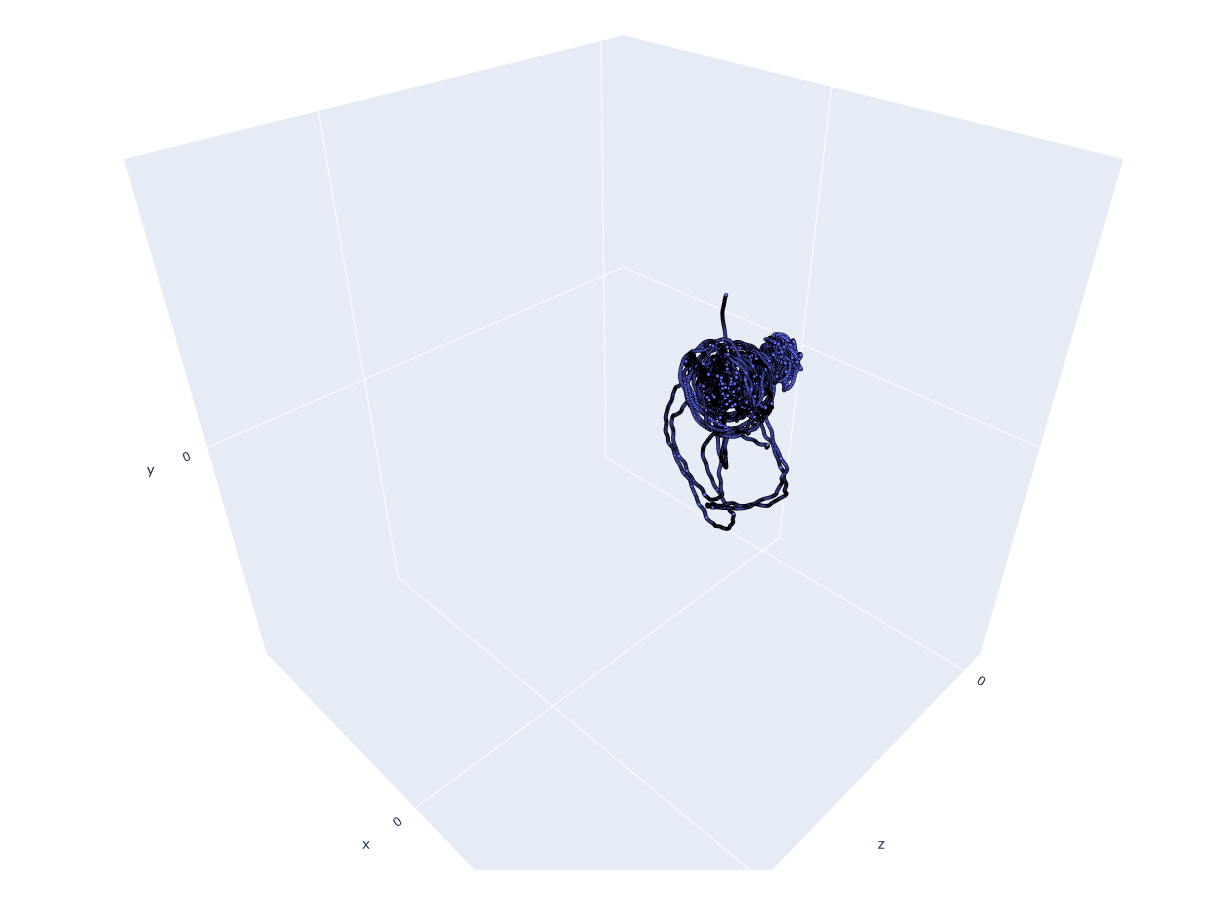

In [129]:
layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1))



fig = go.Figure(data=[go.Scatter3d(x=_data[:,0], y=_data[:,2], z=_data[:,1],
                                   mode='markers')])

fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(scene_aspectmode='cube', scene_camera=camera,
        width=900, height=900,
        margin=dict(t=25, r=0, l=20, b=30),
        scene = dict(
            xaxis = dict(nticks=4, range=[-400,400],),
            yaxis = dict(nticks=4, range=[-400, 400],),
            zaxis = dict(nticks=4, range=[-50, 750],),),)
fig.show()